# PySub Tutorial 3 - Calculation and display of subsidence derivatives, advanced figures

Welcome to the third example case for building, where we use previously determined subsidence from Tutorial 2 to calculate the slope, concavity and rate. And work out how to display the resulting data in various ways.

This tutorial can be found in the folder "Example folder", in the folder where your PySub package has been installed:
.../python-subsidence/Examples

The tutorial assumes installation has been succesful and this Notebook is being run in an environment where PySub has been succesfully installed. The instalation instructions are available (.../python-subsidence/Documentation/Documentation.py). 

The case we are studying is a the result of Tutorial 2, so make sure you have run that code so the model file is saved in the Tutorial 2 folder. The goal is to familiarize you with the PySub model, it's syntax and functionality. 

The PySub modules used in this tutorial are: plot_utils and memory

Notes:
- For now the files in this example are stored on the TNO-AGE server, so make sure you are connected!

## The code
In below cells, an example is given of PySub code where the subsidence is loaded and relevant derivatives determined and displayed. After running these cells, we will run through each line and discuss the methods used.

After this, methods to refine your plots will be discussed.

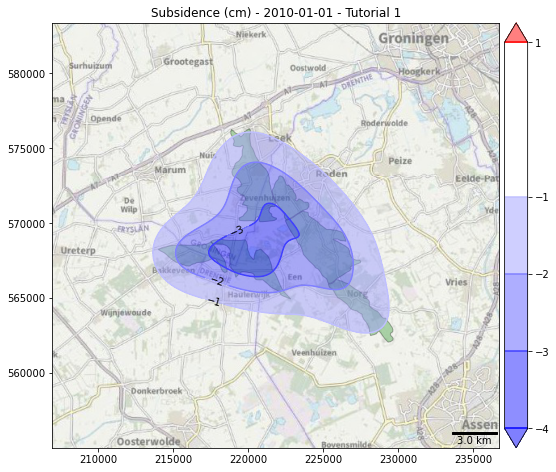

In [1]:
from PySub.memory import load
from PySub import plot_utils as plot
load_file = r'Tutorial 1\save\Tutorial 1.smf'
Model = load(load_file)

plot.plot_subsidence(Model)

Calculating subsidence gradient, model: Tutorial 1
Calculated subsidence gradient, model: Tutorial 1


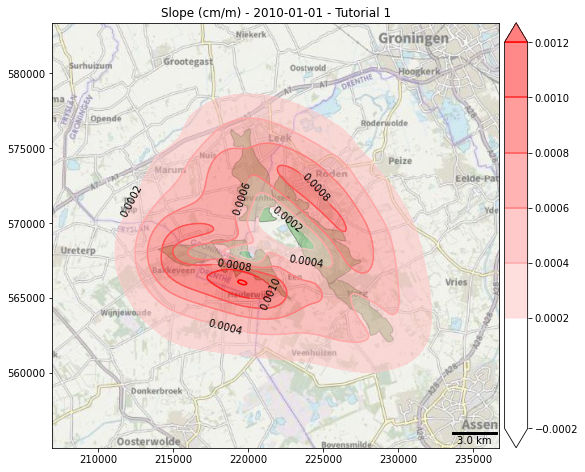

In [2]:
Model.calculate_slope()  
plot.plot_subsidence(Model, 
                     variable = 'slope', 
                     contour_steps = 2e-6)


Calculating subsidence concavity, model: Tutorial 1
Calculated subsidence concavity, model: Tutorial 1


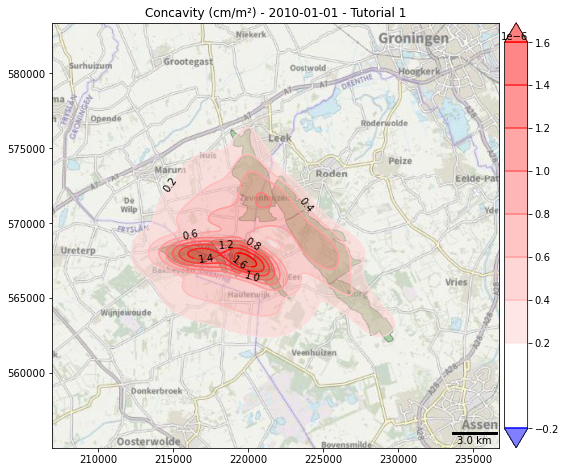

In [3]:
Model.calculate_concavity() 
plot.plot_subsidence(Model, 
                     variable = 'concavity', 
                     contour_steps = 2e-9)

Calculating subsidence rate, model: Tutorial 1
Calculated subsidence rate, model: Tutorial 1


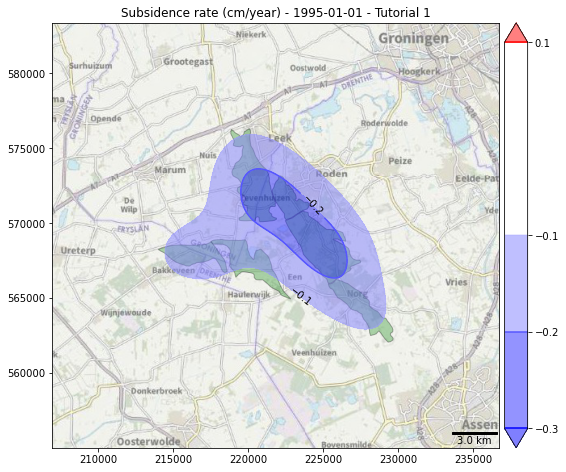

In [4]:
Model.calculate_subsidence_rate()  
plot.plot_subsidence(Model, variable = 'subsidence_rate', time = 1995,
                     contour_steps = 0.001)

## Slope
The slope is defined here as the difference in subsidence ($\frac{m}{m}$) over a 2D distance:
$$slope = \frac{\Delta u_z}{\Delta x}, \frac{\Delta u_z}{\Delta y}$$
So it is only the slope of the subsidence bowl.

Any spatial gradients presented here are determined using analytical derivatives. The rate is determined by using a second order central difference scheme over time.

The slope given here is the gradient magnitude: $\sqrt{\frac{\Delta u_z}{\Delta x}^2 + \frac{\Delta u_z}{\Delta y}^2}$

Concerning subsidence the slope might give insight in the differential vertical displacement over a given distance caused by this subsidence.

To calculate the slope using PySub:

In [5]:
help(Model.calculate_slope)

Help on method calculate_slope in module PySub.SubsidenceModelBase:

calculate_slope(reservoir=None, numeric=False, _print=True) method of PySub.SubsidenceModelGas.SubsidenceModel instance
    Returns the spatial gradient of the subsidence in m/m.
    
    Parameters
    ----------
    reservoir : int, str or list of int or str, optional
        The index or name of the reservoirs you want to know the slope of. 
        If it is a list, the cumulative slope of all the reservoirs in that 
        list will be determined. The default is None. When None, all reservoirs 
        will be accumulated.
    numeric : bool, optional
        If True, the calculations will be determined numerically 
        (second order central difference scheme). The default is False. When
        False the slope will be determined analytically.
    
    Returns
    -------
    xr.DataSet
        The gradient of the subsidence in m/m for each coordinate, reservoir and timestep.
        The dimentions of the dat

## Concavity
The concavity is defined here as the difference in difference in subsidence over a 2D distance. Or: The curvature of the subsidence bowl in $\frac{m}{m^2}$ and is in turn the difference in slope over a distance.

$$concavity = 
  \frac{\Delta^2 u_z}{\Delta x^2},
  \frac{\Delta^2 u_z}{\Delta x\Delta y},
  \frac{\Delta^2 u_z}{\Delta y^2},
  \frac{\Delta^2 u_z}{\Delta x \Delta y},
  $$

The concavity given here is the concavity magnitude (the square root of the sum of squares of the terms in concavity).

To calculate the concavity using PySub:

In [6]:
help(Model.calculate_concavity)

Help on method calculate_concavity in module PySub.SubsidenceModelBase:

calculate_concavity(reservoir=None, numeric=False, _print=True) method of PySub.SubsidenceModelGas.SubsidenceModel instance
    Returns the second order derivative of the subsidence in m²/m.
    
    Parameters
    ----------
    reservoir : int, str or list of int or str, optional
        The index or name of the reservoirs you want to know the concavity of. 
        If it is a list, the cumulative concavity of all the reservoirs in that 
        list will be determined. The default is None. When None, all reservoirs 
        will be accumulated.
    numeric : bool, optional
        If True, the calculations will be determined numerically 
        (second order central difference scheme). The default is False. When
        False the concavity will be determined analytically.
    
    
    Returns
    -------
    xr.DataSet
        The concavity of the subsidence in m²/m for each coordinate, reservoir and timestep

## Rate
The rate (subsidence over time, $\frac{\Delta u}{\Delta t}$) is determined in m/year using:

In [7]:
help(Model.calculate_subsidence_rate)

Help on method calculate_subsidence_rate in module PySub.SubsidenceModelBase:

calculate_subsidence_rate(_print=True) method of PySub.SubsidenceModelGas.SubsidenceModel instance
    Returns the temporal gradient of the subsidence in m/y. 
    
    Returns
    -------
    xr.DataSet
        The rate of subsidence in m/year for each coordinate, reservoir and timestep.
        The dimentions of the dataset are (y, x, reservoir, time).



## Displaying the new data
The results of these functions are stored in Model.variable and can be retreived using for instance:

In [8]:
slope = Model.slope
concavity = Model['concavity']
rate = getattr(Model, 'subsidence_rate'); # note the need to add 'subsidence:' before rate

But to plot the results we don't need to use a function other than plot_subsidence. Some considerations are in order. 

In [9]:
help(plot.plot_subsidence)

Help on function plot_subsidence in module PySub.plot_utils:

plot_subsidence(Model, reservoir=None, time=-1, buffer=0, model=None, variable='subsidence', unit='cm', plot_reservoir_shapes=True, additional_shapes=[], service='opentopo', layer='opentopoachtergrondkaart', figsize=(8, 8), epsg=28992, contour_levels=None, contour_steps=0.01, title=None, final=True, fname='subsidence', svg=False, shape_kwargs={}, raster_kwargs={}, contourf_kwargs={}, contour_kwargs={}, clabel_kwargs={}, colorbar_kwargs={}, scatter_kwargs={})
    Plot contours of the calculated subsidence.
    
    Parameters
    ----------
    Model : SubsidenceModel or ModelSuite objects
    reservoir : int, str or list of int or str, optional
        The index or name of the reservoirs you want to plot. If it is a 
        list, multiple reservoirs will be displayed. The default is None.
        When None, all reservoirs will be displayed.
    time : int, str, optional
        The index or name of the timestep you want to 

For instance, the contour_steps parameter is set to a standard of 0.01 m. If the chosen variable doesn't produce enough or too many contours with this setting, we need to adjust this. We can find the range of the variables by for instance:

In [10]:
print(f"""{Model.slope.max().values: g} m""")

 1.20598e-05 m


All values for this parameter are positive and since the maximum value is quite low, there will be no contour lines set at 0.01 m. Here we choose a contour step size of 2e-6 m:

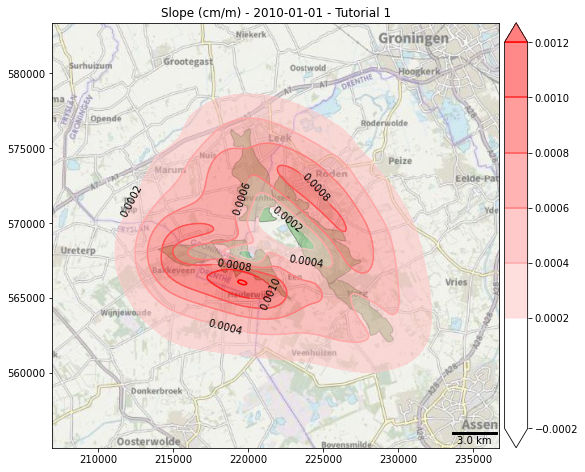

In [11]:
plot.plot_subsidence(Model, 
                     variable = 'slope', 
                     contour_steps = 2e-6)

You can also define the contour levels yourselves, but the variable contour_steps will still play a role. Then it determines the amount of transparent fill of the contours:

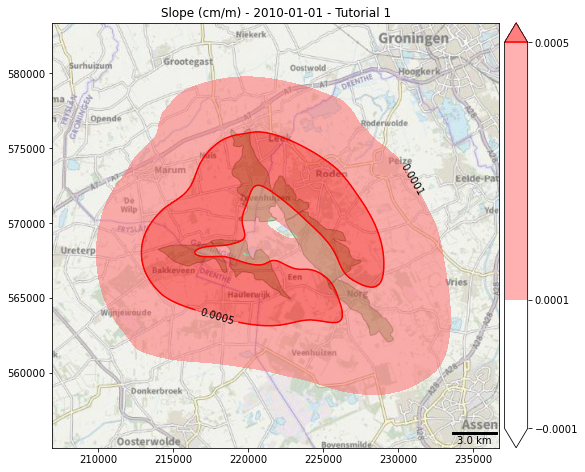

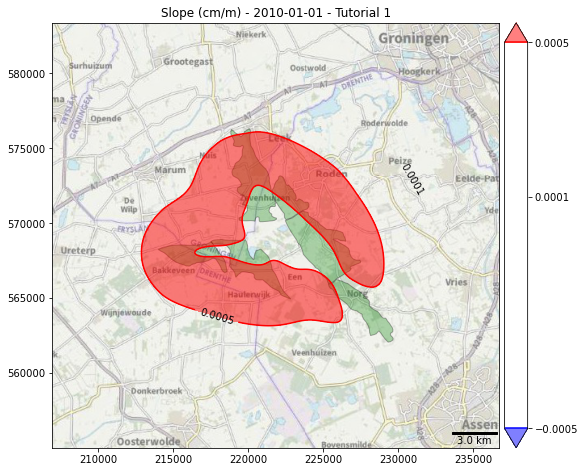

In [12]:
plot.plot_subsidence(Model, 
                     variable = 'slope', 
                     contour_levels = [1e-6, 5e-6],
                     contour_steps = 1e-6)

plot.plot_subsidence(Model, 
                     variable = 'slope', 
                     contour_levels = [1e-6, 5e-6],
                     contour_steps = 5e-6)

You can check which contours are going to appear with which step size using:

In [13]:
Model.get_contour_levels('slope', contour_steps = 2e-6)

array([-2.0e-06,  2.0e-06,  4.0e-06,  6.0e-06,  8.0e-06,  1.0e-05,
        1.2e-05])

The 'slope' result of calculate_slope is a slope magnitude. It tells you how much the area is sloping, but it doesn't tell you which way. The slope_x and slope_y results do. In below figures, the negative values indicate that the slope over the x-axis is decreasing over increasing x-axis (or decreasing slope over the y_axis with incresing y-axis). 

The variables set by concavity are the concavity mignitude (as just concavity) and concavity_xx, concavity_xy, concavity_yx, concavity_yy variables. 

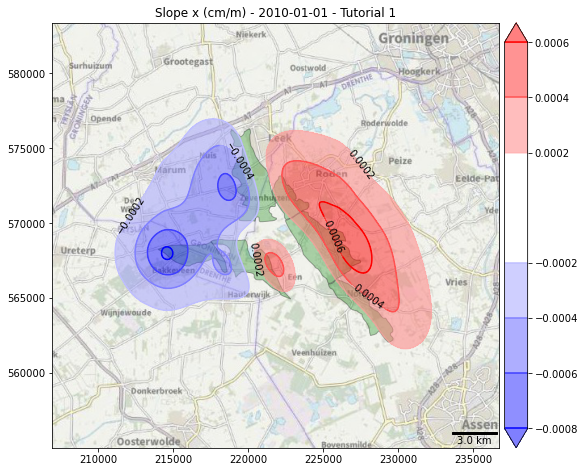

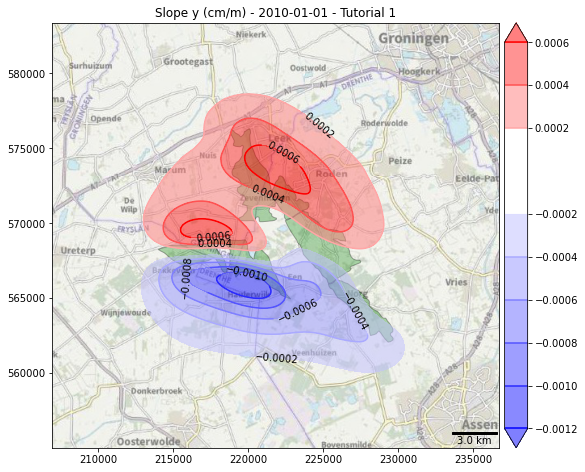

In [14]:
plot.plot_subsidence(Model, 
                     variable = 'slope_x', 
                     contour_steps = 2e-6)
plot.plot_subsidence(Model, 
                     variable = 'slope_y', 
                     contour_steps = 2e-6)

## Background layers
The standard background maps chosen in PySub are a Dutch set of topographical maps (OpenTopo). Other maps can be added by finding the link to its wmts service and its layer to the arguments of the plot function. Chances are, that the WMTS function is not in the same coordinate system that your data is in, so specify the coordinate system your data is in.

# Adjusting visuals
The PySub plotting functions pass arguments to matplotlib.pyplot functions to dictate the plotted result. The default arguments are stored in the Model object. If we want to see the default values we can go to the model object and check which defaults values are set for each type of function. 

In [15]:
Model.contourf_defaults

{'cmap': 'bwr', 'alpha': 0.5, 'extend': 'both'}

The defaults can be set with:

In [16]:
Model.set_contourf_defaults({'cmap': 'jet'})

The explanation on how to adjust the defaults and which are available can be found by passing the desired setting function to the help function:

In [17]:
help(Model.set_contourf_defaults)

Help on method set_contourf_defaults in module PySub.SubsidenceModelBase:

set_contourf_defaults(kwargs={}) method of PySub.SubsidenceModelGas.SubsidenceModel instance
    Set the standard keyword arguments for matplotlib.pyplot.contourf.
    These will influence the presentation of filled contours in figures.
    
    Parameters
    ----------
    kwargs : dict
        A dictionary with the keyword arguments for the matplotlib.pyplot.contourf
        function. The dictionary should be built like: 
            {'keyword': value, 'other_keyword': other_value}.
        The keyword argument must be a string that is one of the kwargs (other parameters)
        of matplotlib.pyplot.contourf. Which keyword arguments are available
        and which values fit with it, are noted here:
        https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.contourf.html



When setting the default kwargs for that function all the plotting functions that make filled contours will use these arguments. If you want a specific call to a function you can set the keyword arguments in the function as well:

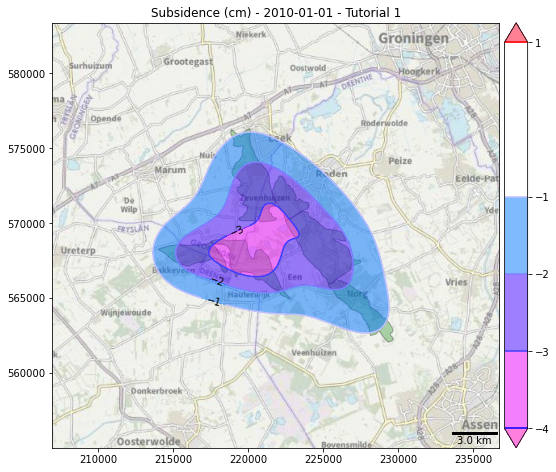

In [18]:
plot.plot_subsidence(Model, contourf_kwargs = {'cmap': 'gist_rainbow_r'})

The possible kwargs are visible in the help function for the plot function.

## Shapes
The reservoirs are shown in the figures as polygons (standard green) and the caverns are displayed as points. It is also possible to have grids shown. Each of these type of spatial representations of a reservoir or cavern are stored in a geometry object from PySub.

In this part, we are discussing the use of shapes in the PySub tool. It is not the aim of the PySub tool to make editable shapes. We recommend GIS software to make figures using poylgons, lines and points. PySub's tools for this are limited.

The shapes of the reservoirs can be removed from the final figure by setting the plot_reservoir_shapes argument to False:

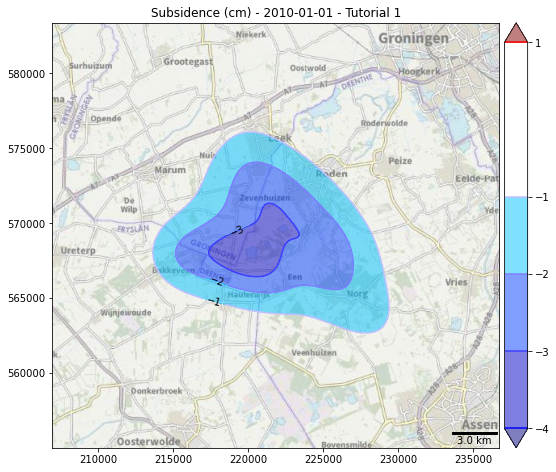

In [19]:
plot.plot_subsidence(Model, plot_reservoir_shapes = False)

Note that the contours are now plotted with the "jet" colormap. The shapes can be highlighted by setting the specific color of a shape. There are 3 reservoirs that have shapes plotted for the gas reservoirs, the others are scattered points for the salt mines.

In [20]:
yellow         = (1, 1, 0) # or 'yellow'
green          = (0, 1, 0) # or 'green'
gas_reservoirs = ['Norg', 'Allardsoog', 'Een']
colors         = [yellow,  green,        green]

for color, reservoir in zip(colors, gas_reservoirs): print(reservoir, color)

Norg (1, 1, 0)
Allardsoog (0, 1, 0)
Een (0, 1, 0)


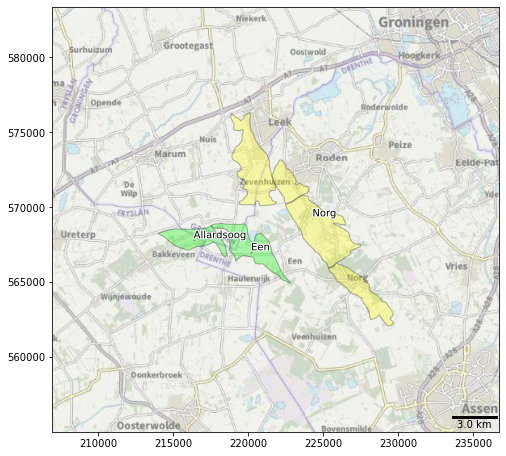

In [21]:
plot.plot_reservoirs(Model, shape_kwargs = {'fc': colors})

Below figure has had some additional editing done.
Maybe that's a bit far out and we want to zoom in (a negative sign before the buffer parameter).
I want to add some additional information to this figure, not native to PySub! Like:
- a legend for the colors I have been using. We want it clear that the yellow field is the field that's going to be producing and the others have been producing already. Therefore, We want the labels to say yellow = Producing soon and green = Producing.
- labels for the x- and y-axis

We can retreive the figure for additional plotting by setting final to False. This returns a matplotlib fig and ax object, allowing for further manipulation of the figure:

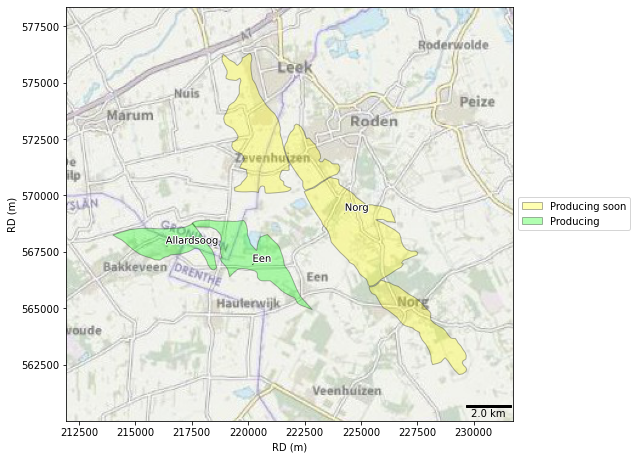

In [22]:
# Return a fig and ax object
fig, ax = plot.plot_reservoirs(
    Model, 
    shape_kwargs = {'fc': colors}, 
    final = False,
    buffer = -5000 # In m
)

# Set the axis labels
ax.set_xlabel('RD (m)')
ax.set_ylabel('RD (m)')

# Get how the legend object are supposed to look like
# using the relevant keyword arguments.
# for more info, use help(plot.add_custom_legend).
legend_kwargs = [Model.shape_defaults.copy() for c in (yellow, green)]
for i, c in enumerate((yellow, green)):
    legend_kwargs[i]['facecolor'] = c

# Make some good labels:
legend_labels = ['Producing soon', 'Producing',]
    
plot.add_custom_legend(ax, 'polygon', 
                       kwargs = legend_kwargs, 
                       labels = legend_labels)
fig.show()

In [ ]:
line = {'A': (213485, 564958),
        'B': (227963, 573031)}
plot.plot_overlap_cross_section(Model, line, variable = 'slope_x', mode = 'individual', contour_steps = 1e-9)

In [24]:
help(plot.plot_overlap_cross_section)

Help on function plot_overlap_cross_section in module PySub.plot_utils:

plot_overlap_cross_section(Model, lines=None, mode='cumulative', variable='subsidence', reservoir=None, time=-1, model=None, plot_reservoir_shapes=True, additional_shapes=[], unit='cm', num=1000, plot_figsize=(12, 8), service='opentopo', layer='opentopoachtergrondkaart', map_figsize=(8, 8), epsg=28992, cross_section_title=None, map_title=None, contour_levels=None, contour_steps=0.01, y_axis_exageration_factor=2, ylim=None, final=True, fname='overlap', svg=False, legend=True, horizontal_line=None, plot_kwargs={}, raster_kwargs={}, shape_kwargs={}, contourf_kwargs={}, contour_kwargs={}, clabel_kwargs={}, colorbar_kwargs={}, annotation_kwargs={}, fill_between_kwargs={})
    Plot a map of the cross section in a 2D representation, and
    plot a line or set of lines of the subsidence along that cross section.
    
    Parameters
    ----------
    Model : SubsidenceModel or ModelSuite objects
    lines : List, float/in